#Assignment Code: DA-AG-017

Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
* Difference between K-Means and Hierarchical Clustering;
     * K-Means is a partitioning method that directly divides the dataset into k clusters, whereas Hierarchical clustering builds a tree-like structure of clusters. In K-Means, the number of clusters (k) must be specified in advance, while in Hierarchical clustering it is not required, as the dendrogram can help decide the number of clusters.
     * K-Means is fast and efficient, making it suitable for large datasets, while Hierarchical clustering is computationally heavy, so it works better for small to medium datasets. K-Means assumes clusters are spherical and of similar size, whereas Hierarchical clustering does not make such strict assumptions and can capture nested or irregular shapes. Finally, K-Means produces a flat set of clusters, while Hierarchical clustering produces a hierarchical structure with multiple levels.

* Use Cases;
 1. K-Means Clustering (Flat Partitioning)
      * Use Case: Customer segmentation in retail.
      * Example: A supermarket groups customers into k segments (e.g., budget shoppers, premium buyers, seasonal shoppers) based on purchase history, so they can target each group with specific marketing strategies
 2. Hierarchical Clustering (Nested Grouping)
      * Use Case: Document or gene similarity analysis.
      * Example: In bioinformatics, hierarchical clustering is used to create a dendrogram of gene expression data to identify genes with similar activity patterns, showing relationships at different levels.


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
* The Silhouette Score is used to measure the quality of clustering. It shows how well a data point fits within its own cluster compared to other clusters.
* The score ranges from -1 to +1:

       * +1 → Well-clustered (point is close to its own cluster and far from others).
       * 0 → On the boundary between clusters.
       * -1 → Possibly in the wrong cluster.

* The silhouette score helps:
       * Evaluate clustering quality → Check if clusters are compact and distinct.
       * Compare algorithms or parameters → For example, deciding the best value of k in K-Means.

* In simple word, The Silhouette Score validates how well clustering has performed by balancing cohesion (similarity within a cluster) and separation (difference from other clusters).


Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
* DBSCAN relies on two main parameters:
   * ε (Epsilon / Radius): The maximum distance within which points are considered neighbors. A larger ε may merge clusters, while a smaller ε creates tighter clusters and can increase noise.
   * MinPts (Minimum Points): The minimum number of neighboring points (within ε) required to form a cluster. A higher MinPts makes clusters more strict and reduces noise sensitivity, while a lower MinPts can form many small clusters.

* Influence on Clustering;
   * High ε + Low MinPts → Larger, fewer clusters with less noise.
   * Low ε + High MinPts → Smaller, tighter clusters with more noise.
   * Together, ε and MinPts define the density threshold, which controls how clusters form and how noise points are detected.


Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
* Feature scaling is important in clustering because algorithms like K-Means and DBSCAN rely on distance measures (e.g., Euclidean distance) to group data points. If features are on different scales, the feature with larger values can dominate the distance calculation, leading to biased or incorrect clusters.
* In K-Means, scaling ensures all features contribute equally to the calculation of centroids and distances.
* In DBSCAN, scaling helps maintain a consistent notion of neighborhood radius (ε), so clusters are detected properly.
* Feature scaling ensures fair distance calculations, prevents bias from large-valued features, and improves the quality of clustering.


Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
* Elbow Method in K-Means;

   * The Elbow Method is a popular technique to decide the optimal number of clusters (k) in K-Means clustering. It involves plotting the Within-Cluster Sum of Squares (WCSS) against different values of k.
   * As k increases, WCSS decreases because clusters become smaller and tighter. However, beyond a certain point, the rate of improvement drops, and the curve forms an “elbow” shape. The value of k at this elbow is chosen as the optimal number of clusters, as it provides the best balance between cluster compactness and model simplicity.

* How It Helps?
   * Avoids under-clustering (too few clusters, poor grouping).
   * Avoids over-clustering (too many clusters, unnecessary complexity).
   * Identifies the k that naturally fits the data best.

* The Elbow Method helps pick the “sweet spot” where adding more clusters no longer gives significant improvement.


**Dataset**:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.


Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

(Include your Python code and output in the code box below.)



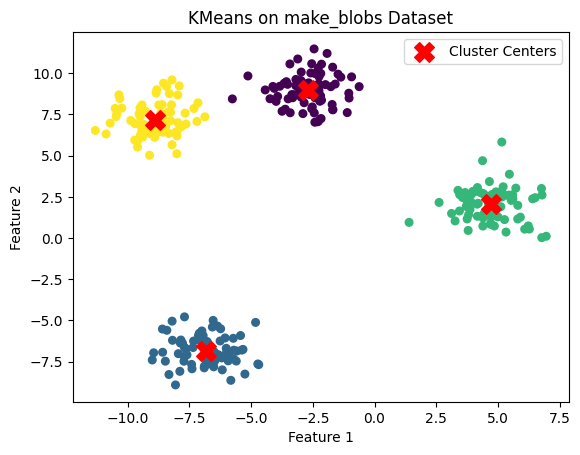

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the results with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Cluster Centers')
plt.title("KMeans on make_blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

(Include your Python code and output in the code box below.)


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = load_wine().data
X_scaled = StandardScaler().fit_transform(X)
labels = DBSCAN(eps=1.5, min_samples=5).fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", n_clusters)


Number of clusters found: 0


Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

(Include your Python code and output in the code box below.)

/tmp/ipython-input-1162440414.py:12: RuntimeWarning: invalid value encountered in divide
  color = 'k' if k == -1 else plt.cm.Spectral(float(k) / (max(labels) if max(labels) != -1 else 1))


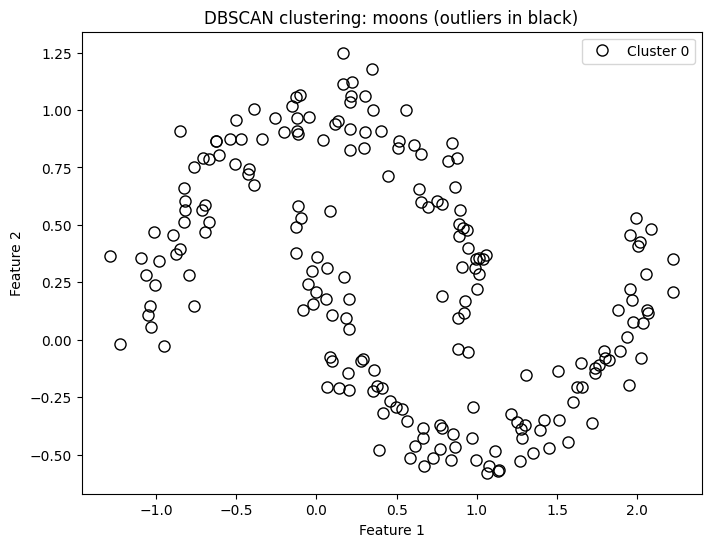

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=200, noise=0.1, random_state=40)
labels = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)

plt.figure(figsize=(8, 6))
for k in set(labels):
    mask = labels == k
    color = 'k' if k == -1 else plt.cm.Spectral(float(k) / (max(labels) if max(labels) != -1 else 1))
    label = 'Outlier' if k == -1 else f'Cluster {k}'
    plt.plot(X[mask, 0], X[mask, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=8, label=label)
plt.title('DBSCAN clustering: moons (outliers in black)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

(Include your Python code and output in the code box below.)

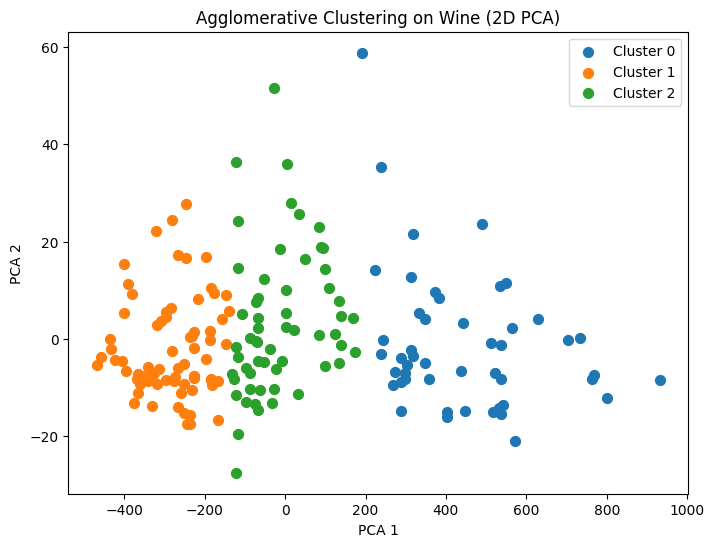

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

X = load_wine().data
X_pca = PCA(n_components=2, random_state=40).fit_transform(X)
labels = AgglomerativeClustering(n_clusters=3).fit_predict(X_pca)

plt.figure(figsize=(8, 6))
for k in set(labels):
    mask = labels == k
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {k}', s=50)
plt.title('Agglomerative Clustering on Wine (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:
*  Which clustering algorithm(s) would you use and why?
* How would you preprocess the data (missing values, scaling)?
* How would you determine the number of clusters?
* How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)

Answer-
* Clustering Workflow for Customer Segmentation
  1. Algorithm Choice
      * I would start with K-Means clustering because it is efficient, interpretable, and works well when we assume customers can be grouped into distinct segments.
      * Additionally, I might try Hierarchical Clustering for better visualization of customer relationships and DBSCAN if I suspect noise or irregular cluster shapes.
  2. Preprocessing Steps
      * Handle missing values: Median for numerical (Age, Income, Spending), mode for categorical (e.g., Gender).
      * Scaling: Standardize all numerical features to equalize influence.
      * Encoding: Convert categorical variables using one-hot encoding if needed.
  3. Choosing Number of Clusters
      * Use Elbow Method (plot inertia vs. number of clusters).
      * Use Silhouette Score to validate cluster quality.
  4. Benefits for the Marketing Team
      * Identify high-value customers for premium offers.
      * Segment bargain seekers for discount campaigns.
      * Personalize marketing strategies → improve conversion rate & customer satisfaction.

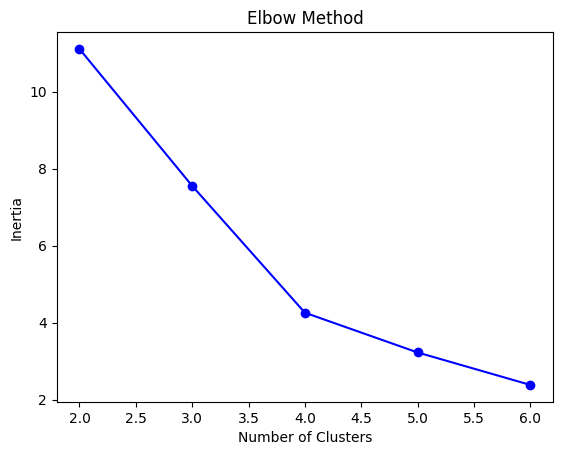

Clustered Customers:
    CustomerID   Age  AnnualIncome  SpendingScore  Cluster
0           1  25.0       40000.0           60.0        0
1           2  34.0       52000.0           65.0        0
2           3  45.0       58000.0           45.0        2
3           4  23.0       35000.0           70.0        0
4           5  35.0       62000.0           50.0        2
5           6  52.0       72000.0           30.0        2
6           7   NaN       80000.0           20.0        1
7           8  48.0           NaN           25.0        2
8           9  33.0       45000.0            NaN        0
9          10  29.0       38000.0           55.0        0

Silhouette Score: 0.37


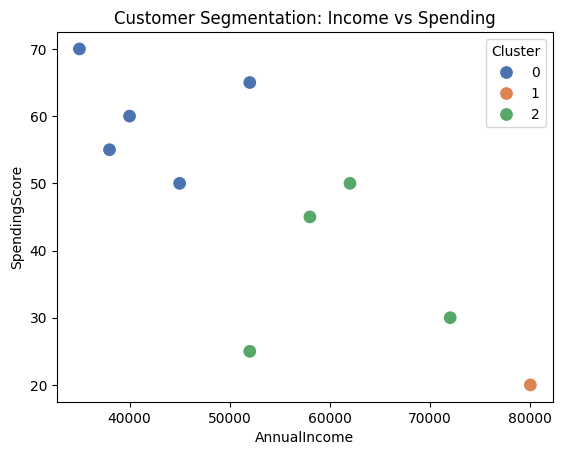

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "CustomerID": range(1, 11),
    "Age": [25, 34, 45, 23, 35, 52, np.nan, 48, 33, 29],
    "AnnualIncome": [40000, 52000, 58000, 35000, 62000, 72000, 80000, np.nan, 45000, 38000],
    "SpendingScore": [60, 65, 45, 70, 50, 30, 20, 25, np.nan, 55]
}
df = pd.DataFrame(data)

imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df[["Age", "AnnualIncome", "SpendingScore"]]),
                          columns=["Age", "AnnualIncome", "SpendingScore"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

inertia = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.plot(range(2, 7), inertia, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df["Cluster"] = clusters

print("Clustered Customers:\n", df)
print(f"\nSilhouette Score: {silhouette_score(df_scaled, clusters):.2f}")

sns.scatterplot(x=df_imputed["AnnualIncome"], y=df_imputed["SpendingScore"],
                hue=df["Cluster"], palette="deep", s=100)
plt.title("Customer Segmentation: Income vs Spending")
plt.show()
